## Homework Set 3 - Connor Johnson

#### Preliminary Imports

In [15]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import root
from scipy.misc import derivative
from scipy.signal import argrelextrema
import math
from math import exp
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
%config InlineBackend.figure_format = 'png'
from matplotlib import pyplot as plt

from itertools import product

plt.rcParams["font.family"]='Times New Roman'
plt.rcParams["mathtext.fontset"]='stix'
# set fontsize in markdown cells
from IPython.core.display import display, HTML, Math, Latex
display(HTML("<style>.rendered_html { font-size: 16px; }</style>"))

### Problem 1

#### Part (a)

In [16]:
# Phase portrait: streamplot
def PP_2d(x1,x2,y1,y2,f1,f2,ax,nx=100,ny=100,dens=[1,1],lw=1,col='k'):
    ax = ax or plt.gca()
    x = np.linspace(x1,x2,nx)
    y = np.linspace(y1,y2,ny)
    X,Y = np.meshgrid(x,y)
    U = f1(X,Y); V = f2(X,Y)
    ax.streamplot(X,Y,U,V,density=dens,
                 linewidth=lw,color=col,arrowstyle='->')
    return ax

# Bifurcation diagram: x vs r
def BF_diag(f,x1,x2,r1,r2,nx=80,nr=80,title='',x_lab='$r$'):
    fx = lambda x,r: derivative(f,x,dx=1e-6,args=(r,))
    x=np.linspace(x1,x2,nx)
    r=np.linspace(r1,r2,nr)
    R,X = np.meshgrid(r,x)
    Z = f(X,R)
    Zx= fx(X,R)
    Zu= np.ma.masked_where(Zx<0,Z)
    Zs= np.ma.masked_where(Zx>0,Z)
    fig, ax=plt.subplots()
    ax.contour(R,X,Zs,levels=[0],colors='k',linewidths=3)
    ax.contour(R,X,Zu,levels=[0],colors='k',linewidths=3,linestyles='dashed')
    ax.grid()
    ax.set_xlabel(x_lab)
    ax.set_ylabel('$x^\star$')
    ax.set_title(title,color='b')
    plt.show()    

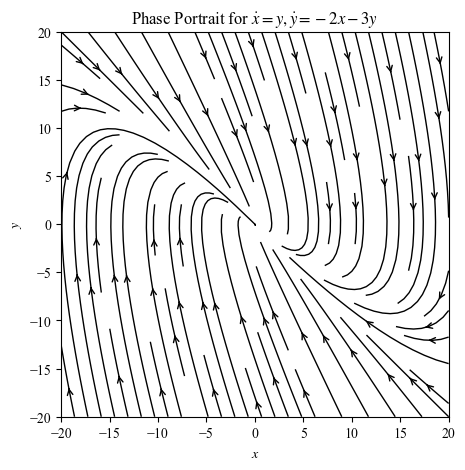

In [17]:
f_x = lambda x,y: y
f_y = lambda x,y: -2*x -3*y

_, ax = plt.subplots(figsize=(5,5))
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_title("Phase Portrait for $\dot{x} = y, \dot{y} = -2x-3y$")
ax = PP_2d(-20,20,-20,20, f_x, f_y, ax)

Solving for the fixed point:<br>
$\dot{x} = 0 \rightarrow y = 0$ <br> $\dot{y} = 0 \rightarrow -2x-3y = 0 \rightarrow 2x = -3y \rightarrow 2x = -3(0) \rightarrow x = 0$<br>
Let $A = \begin{bmatrix} 0 & 1 \\ -2 & -3 \end{bmatrix}$. Then $\dot{X} = \begin{bmatrix} \dot{x} \\ \dot{y} \end{bmatrix} = A\begin{bmatrix} x \\ y \end{bmatrix}$. <br>
$tr(A) = -3, det(A) = 0 - (-2) = 2$. $\Delta = (tr(A))^2 - 4det(A) = 9 - 4(2) = 1.$ <br>
Since $\Delta>0$, $det(A)>0$, and $tr(A) < 0$, the fixed point $(x^*, y^*) = (0, 0)$ is a stable node.

#### Part (b)

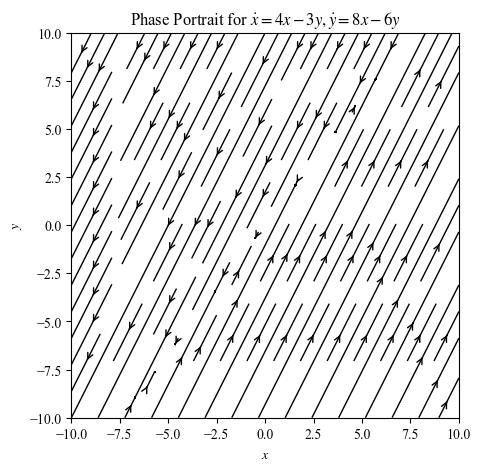

In [18]:
f_x = lambda x,y: 4*x - 3*y
f_y = lambda x,y: 8*x - 6*y

_, ax = plt.subplots(figsize=(5,5))
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_title("Phase Portrait for $\dot{x} = 4x-3y, \dot{y} = 8x-6y$")
ax = PP_2d(-10,10,-10,10, f_x, f_y, ax, nx = 200, ny = 200)

Solving for fixed points:<br>
$\dot{y} = 0 = 8x-6y = 2(4x-3y)$<br>$\dot{x} = 0 = 4x-3y \rightarrow$ Line of fixed points where $4x-3y=0$.
<br>
$A = \begin{bmatrix} \partial_x \dot{x} & \partial_y \dot{x} \\ \partial_x \dot{y} & \partial_y \dot{y} \end{bmatrix}$
$ = \begin{bmatrix} 4 & -3 \\ 8 & -6 \end{bmatrix} \rightarrow det(A) = 4(-6) - 8(-3) = 0, tr(A) = 4 + (-6) = -2$
<br>
$\lambda_1,\lambda_2=\frac{tr(A)}{2} \pm \sqrt{(\frac{tr(A)}{2})^2 - det(A)}=\frac{tr(A)}{2}\pm\frac{tr(A)}{2}=-2,0$
<br>
Since $det(A)=0$, the fixed points neither act as a sink or a source. Since one of the eigenvalues is zero, the fixed points create a line. Therefore, since the system looks Lyapunov stable along the line $4x-3y=0$, the line of fixed points are neutrally stable fixed points. 

#### Part (c)

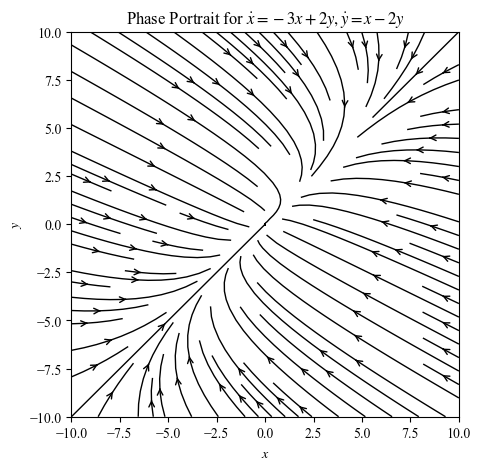

In [19]:
f_x = lambda x,y: -3*x + 2*y
f_y = lambda x,y: x - 2*y

_, ax = plt.subplots(figsize=(5,5))
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_title("Phase Portrait for $\dot{x} = -3x+2y, \dot{y} = x-2y$")
ax = PP_2d(-10,10,-10,10, f_x, f_y, ax, nx = 200, ny = 200)

Fixed point: $(x^*, y^*) = (0,0)$<br>
$A = \begin{bmatrix} \partial_x \dot{x} & \partial_y \dot{x} \\ \partial_x \dot{y} & \partial_y \dot{y} \end{bmatrix}$
$ = \begin{bmatrix} -3 & 2 \\ 1 & -2 \end{bmatrix} \rightarrow det(A) = -3(-2) - 2(1) = 4, tr(A) = -3-2 = -5$
<br>
$\Delta = (tr(A))^2-4det(A) = 25 -4(4) = 9$
<br>
Since $\Delta>0$, $det(A)>0$, and $tr(A) < 0$, the fixed point $(x^*, y^*) = (0, 0)$ is a stable node.


#### Part (d)

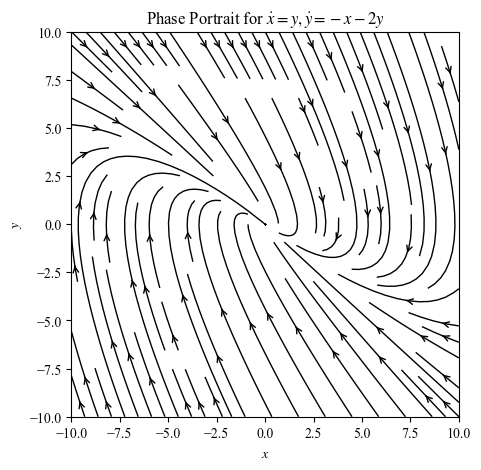

In [20]:
f_x = lambda x,y: y
f_y = lambda x,y: -x - 2*y

_, ax = plt.subplots(figsize=(5,5))
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_title("Phase Portrait for $\dot{x} = y, \dot{y} = -x-2y$")
ax = PP_2d(-10,10,-10,10, f_x, f_y, ax, nx = 200, ny = 200)

Fixed point: $(x^*, y^*) = (0,0)$ <br>
$A = \begin{bmatrix} \partial_x \dot{x} & \partial_y \dot{x} \\ \partial_x \dot{y} & \partial_y \dot{y} \end{bmatrix}$
$ = \begin{bmatrix} 0 & 1 \\ -1 & -2 \end{bmatrix} \rightarrow det(A) = 0 - 1(-1) = 1, tr(A) = -2$
<br>
$\Delta = (tr(A))^2-4det(A) = (-2)^2 -4(1) = 0$
<br>
$\lambda_1,\lambda_2=\frac{tr(A)}{2} \pm \sqrt{(\frac{tr(A)}{2})^2 - det(A)}=\frac{tr(A)}{2}=-1$
<br>
$\begin{bmatrix} 1 & 1 \\ -1 & -1 \end{bmatrix}\begin{bmatrix} v_1 \\ v_2 \end{bmatrix} = 0 \rightarrow v=\begin{bmatrix} 1 \\ -1 \end{bmatrix}$
<br>
Since $\Delta=0$, $tr(A) < 0$, and only one unique eigenvector is found, the fixed point $(x^*, y^*) = (0, 0)$ is a stable degenerate node.

### Problem 2

#### Part (a)

First dynamic variable: $x_1 = I, \dot{x_1} = \dot{I} $<br>
Second dynamic variable: $x_2 = \dot{I}, x_2 = \ddot{I}$
<br>
$\dot{X} = AX = \begin{bmatrix} \partial_{x_1} \dot{x_1} & \partial_{x_2} \dot{x_1} \\ \partial_{x_1} \dot{x_2} & \partial_{x_2} \dot{x_2} \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}$
<br>
$A = \begin{bmatrix} 0 & 1 \\ - \frac{1}{LC} & - \frac{R}{L} \end{bmatrix}$
<br><br>

2D System: $\begin{bmatrix} \dot{x_1} \\ \dot{x_2} \end{bmatrix} = \begin{bmatrix} 0 & 1 \\ - \frac{1}{LC} & - \frac{R}{L} \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}$

#### Part (b)

The fixed point for the system is when $(x_1, x_2) = (0,0)$. 
<br>
$det(A) = (0)(- \frac{R}{L}) - (1)(- \frac{1}{LC}) = \frac{1}{LC},$
<br>$tr(A) = 0 + (- \frac{R}{L}) = - \frac{R}{L},$
<br>
$\Delta = (tr(A))^2 - 4det(A) = (- \frac{R}{L})^2 - 4(\frac{1}{LC}) = \frac{R^2}{L^2} - \frac{4}{LC}$
<br>

When $R=0$, $\Delta<0$, meaning that the system will spiral. Also, $tr(A) = 0$, meaning that the spiral is neither stable or unstable. Since it spirals and is not unstable, initial conditions that start close to the origin will stay close to the origin as the system evolves with time. This means that the system's Liapunov stable and would imply that this system is neutrually stable.
<br>

When $R>0$, $tr(A) < 0$, implying stability and the origin being an attracting fixed point. Also, $det(A) > 0$, meaning that it is not a saddle point or a non-isolated fixed point at the origin. Therefore, since there is no reason why any initial condition, if they start close to the origin, will go away from the origin forever as time passes, it is Liapunov stable. Since the origin is attractive and Liapunov sable, it is asymptotically stable.

#### Part (c)

$\Delta = \frac{R^2}{L^2} - \frac{4}{LC} \rightarrow L^2C\Delta = R^2C - 4L$
<br>
$det(A)>0$ for all values of $R$, $L$, and $C$.
<br>
$tr(A)\leq 0$ for all values of $R$, $L$, and $C$.

When $R^2C-4L>0$, $\Delta>0$, implying that the fixed point is a node. Since $R>0$ to have $\Delta>0$, $tr(A)<0$. This implies stability. Therefore, if $R^2C-4L>0$, then the fixed point at the origin is a stable node.

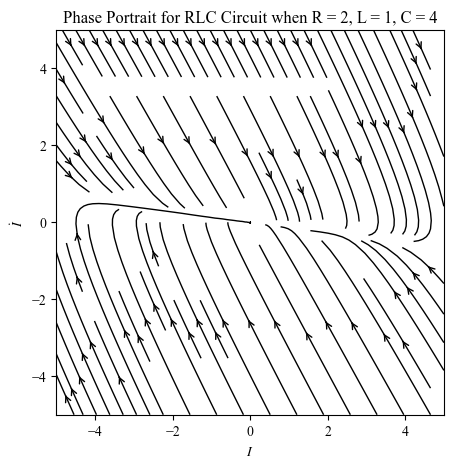

In [21]:
L = 1
C = 4
R = 2

f_x = lambda x,y: y
f_y = lambda x,y: -x/(L*C) - R*y/L

_, ax = plt.subplots(figsize=(5,5))
ax.set_xlabel("$I$")
ax.set_ylabel("$\dot{I}$")
ax.set_title(f"Phase Portrait for RLC Circuit when R = {R}, L = {L}, C = {C}")
ax = PP_2d(-5,5,-5,5, f_x, f_y, ax, nx = 200, ny = 200)

When $R^2C-4L=0$, $\Delta=0$, implying that the fixed point either a star or a degenerate node. Since $R>0$ to have $\Delta=0$, $tr(A)<0$. This implies stability. Therefore, if $R^2C-4L>0$, then the fixed point at the origin is a stable node.
<br>
Solving for the eigenvalues, $\lambda_{1,2} = - \frac{R}{2L} \pm \sqrt{\frac{R^2}{4L^2} - \frac{L}{C}} = - \frac{R}{2L}$. Since $\lambda_1 = \lambda_2$, both eigenvectors can be calculated to be $v_{1,2} = \begin{bmatrix} 1  \\ -\frac{R}{2L} \end{bmatrix}$. Since only one unique eigenvector is found, when $R^2C-4L=0$, the fixed point is a stable degenerate node.

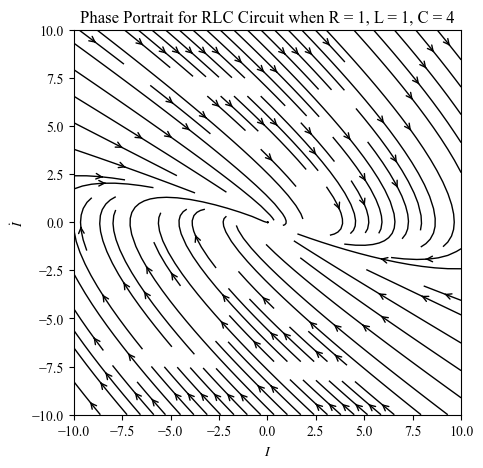

In [22]:
R = 1
_, ax = plt.subplots(figsize=(5,5))
ax.set_xlabel("$I$")
ax.set_ylabel("$\dot{I}$")
ax.set_title(f"Phase Portrait for RLC Circuit when R = {R}, L = {L}, C = {C}")
ax = PP_2d(-10,10,-10,10, f_x, f_y, ax, nx = 200, ny = 200)

When $R^2C-4L<0$, $\Delta<0$, implying that the system will behave in a spiral pattern. Since $R$ can be zero in this case, $tr(A)\geq 0$, meaning that this spiral is either a stable spiral or a neutrally stable spiral.

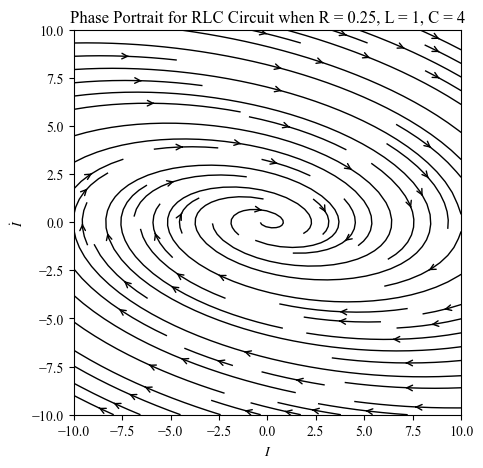

In [23]:
R = 0.25
_, ax = plt.subplots(figsize=(5,5))
ax.set_xlabel("$I$")
ax.set_ylabel("$\dot{I}$")
ax.set_title(f"Phase Portrait for RLC Circuit when R = {R}, L = {L}, C = {C}")
ax = PP_2d(-10,10,-10,10, f_x, f_y, ax, nx = 200, ny = 200)

### Problem 3

#### Part (a)

For $\dot{x} = 0$, $x=0$ or $3-x-y=0$. For $\dot{y}=0$, $y=0$ or $2-x-y=0$. Therefore, the fixed points $(x^*,y^*)$ are $(0,0)$, $(0,2)$, and $(3,0)$.

Classifying stability for each fixed point: <br>
For all points, $A = \begin{bmatrix} \partial_x \dot{x} & \partial_y \dot{x} \\ \partial_x \dot{y} & \partial_y \dot{y} \end{bmatrix} = \begin{bmatrix} 3-2x-y & -x \\ -y & 2-x-2y \end{bmatrix}$.
<br>
For the fixed point $(0,0)$, $A = \begin{bmatrix} 3 & 0 \\ 0 & 2 \end{bmatrix}$.
<br>
$det(A) = 6$, $tr(A) = 5$, $\Delta = 5^2 - 4(6) = 1$.
<br>
Since $det(A)>0$, $tr(A)>0$, and $\Delta>0$, the fixed point is a unstable node.
<br>


For the fixed point $(0,2)$, $A = \begin{bmatrix} 1 & 0 \\ -2 & -2 \end{bmatrix}$.
<br>
$det(A) = -2 < 0$. This would mean that the fixed point is a saddle point.
<br>
Finding the eigenvalues yield $\lambda_1,\lambda_2 = \frac{tr(A)}{2} \pm \sqrt{(\frac{tr(A)}{2})^2-det(A)} = \frac{-1}{2} \pm \sqrt{(\frac{-1}{2})^2-(-2)} = -2, 1$
<br>
This means that the eigenvectors are $v_1=\begin{bmatrix} 0 \\ 1 \end{bmatrix}$, $v_2=\begin{bmatrix} -\frac{3}{2} \\ 1 \end{bmatrix}$
<br>


For the fixed point $(3,0)$, $A = \begin{bmatrix} -3 & -3 \\ 0 & -1 \end{bmatrix}$.
<br>
$det(A) = 3$, $tr(A) = -4$, $\Delta = (-4)^2 - 4(3) = 4$.
<br>
Since $det(A)>0$, $tr(A)<0$, and $\Delta>0$, the fixed point is a stable node.

#### Part (b)

Nullclines for $\dot{x}$:  $x=0$ and $x=3-y$.
<br>
Nullclines for $\dot{y}$:  $y=0$ and $y=2-x$.

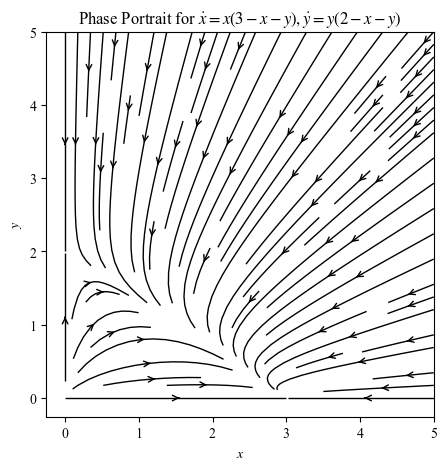

In [24]:
f_x = lambda x,y: x*(3-x-y)
f_y = lambda x,y: y*(2-x-y)

_, ax = plt.subplots(figsize=(5,5))
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_title("Phase Portrait for $\dot{x} = x(3-x-y), \dot{y} = y(2-x-y)$")
ax = PP_2d(0,5,0,5, f_x, f_y, ax)

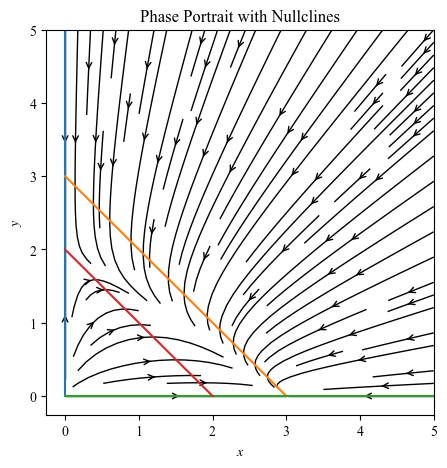

In [25]:
f_x = lambda x,y: x*(3-x-y)
f_y = lambda x,y: y*(2-x-y)

_, ax = plt.subplots(figsize=(5,5))
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_title("Phase Portrait with Nullclines")
ax = PP_2d(0,5,0,5, f_x, f_y, ax)

#x=0
x = np.zeros(200)
y = np.linspace(0,5,200)
plt.plot(x,y)

#x=3-y
y = np.linspace(0,3,200)
x = 3 - y
plt.plot(x,y, scalex=False, scaley=False)

#y=0
y = np.zeros(200)
x = np.linspace(0,5,200)
plt.plot(x,y)

#y=2-x
x = np.linspace(0,2,200)
y = 2 - x
_ = plt.plot(x,y)


#### Part (c)

Since the stable manifold is described by the eigenvector $v=\begin{bmatrix} 0 \\ 1 \end{bmatrix}$, the line $x=0$ is where the basin boundary is. The basin of attraction is the region where $x>0$. The basin of attraction is for the stable fixed point at $(3,0)$. Given the domain and range constrictions, it covers the entire space.

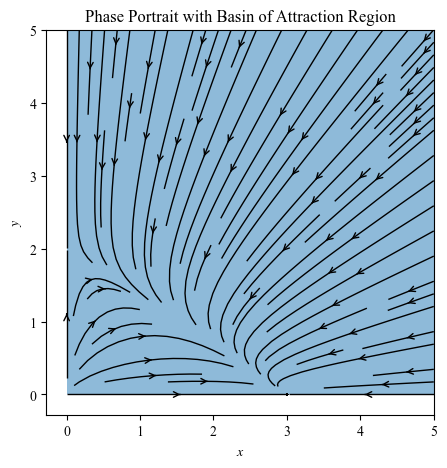

In [26]:
f_x = lambda x,y: x*(3-x-y)
f_y = lambda x,y: y*(2-x-y)

_, ax = plt.subplots(figsize=(5,5))
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_title("Phase Portrait with Basin of Attraction Region")
ax.fill_between(range(6), 0.01, 5.0, alpha=0.5)
ax = PP_2d(0,5,0,5, f_x, f_y, ax)

### Problem 4

#### Part (a)

First dynamic variable: $x_1 = x, \dot{x_1} = \dot{x} $<br>
Second dynamic variable: $x_2 = \dot{x}, x_2 = \ddot{x}$
<br>
$\dot{X} = AX = \begin{bmatrix} \partial_{x_1} \dot{x_1} & \partial_{x_2} \dot{x_1} \\ \partial_{x_1} \dot{x_2} & \partial_{x_2} \dot{x_2} \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}$
<br>
$A = \begin{bmatrix} 0 & 1 \\ 1-2x_1 & 0 \end{bmatrix}$
<br><br>

2D System: $\begin{bmatrix} \dot{x_1} \\ \dot{x_2} \end{bmatrix} = \begin{bmatrix} 0 & 1 \\ 1-2x_1 & 0 \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}$

Fixed points: $\dot{x_1}=0$ when $x_2=0$, $\dot{x_2}=0$ when $x_1=0,1$.
<br>
Fixed points at $(0,0)$ and $(0,1)$ 

Classifying fixed points:<br>
For $(0,0)$, $A = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}$, $det(A)=-1<0$. This means that the fixed point $(0,0)$ is a saddle point. The eigenvalues will be $\lambda_1, \lambda_2 = \pm 1$ and the eigenvectors are $v_1=\begin{bmatrix} 1 \\ 1 \end{bmatrix}$, $v_2=\begin{bmatrix} 1 \\ -1 \end{bmatrix}$
<br>

For $(0,1)$, $A = \begin{bmatrix} 0 & 1 \\ -1 & 0 \end{bmatrix}$, $det(A)=-1<0$, $tr(A)=0$. This means that the fixed point is a center of a spiral that is neither stable or unstable.

#### Part (b)

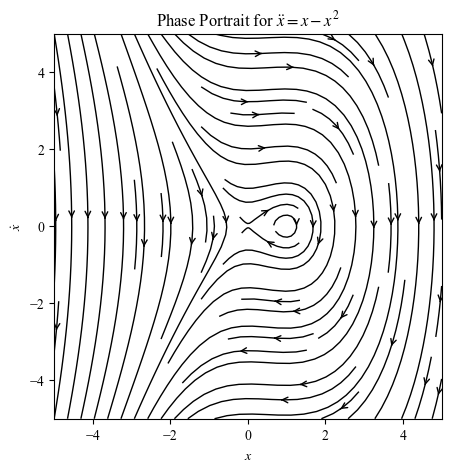

In [27]:
f_x = lambda x,y: y
f_y = lambda x,y: x - x**2

_, ax = plt.subplots(figsize=(5,5))
ax.set_xlabel("$x$")
ax.set_ylabel("$\dot{x}$")
ax.set_title("Phase Portrait for $\ddot{x}=x-x^2$")
ax = PP_2d(-5,5,-5,5, f_x, f_y, ax)

#### Part (c)

The system can be treated like a conservative system where $f(x)=-\dot{V}(x)$. In this case, $f(x) = \ddot{x} = x - x^2$.
<br>
$\frac{dV(x)}{dx} = -(x - x^2) \rightarrow dV(x) = (x^2-x)dx$
<br>
$V(x) = \frac{x^3}{3} - \frac{x^2}{2} + C$
<br>

For a conservative, a constant $E$ is equal to $\frac{\dot{x}}{2} + V(x)$. In this case, $E=\frac{\dot{x}}{2} + \frac{x^3}{3} - \frac{x^2}{2}$. For a homoclinic orbit, $E=0$, which means that the orbit is represented by $0=\frac{\dot{x}}{2} + \frac{x^3}{3} - \frac{x^2}{2}$. In this case, $E>0$ will result in an open trajectory; in contrast, $E<0$ will result in a closed trajectory.

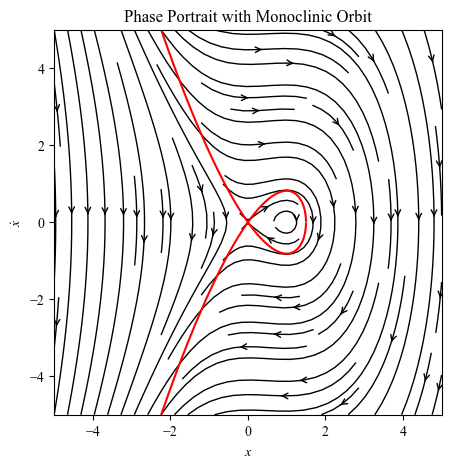

In [28]:
f_x = lambda x,y: y
f_y = lambda x,y: x - x**2

_, ax = plt.subplots(figsize=(5,5))
ax.set_xlabel("$x$")
ax.set_ylabel("$\dot{x}$")
ax.set_title("Phase Portrait with Monoclinic Orbit")
ax = PP_2d(-5,5,-5,5, f_x, f_y, ax)

#y=2sqrt((x^3)/3 - (x^2)/2)
x = np.linspace(-2.23,1.8,2000)
y = 2*np.sqrt(-(x**3)/3 + (x**2)/2)
_ = plt.plot(x,y, color="r")
#y=-2sqrt((x^3)/3 - (x^2)/2)
x = np.linspace(-2.23,1.8,2000)
y = -2*np.sqrt(-(x**3)/3 + (x**2)/2)
_ = plt.plot(x,y, color="r")